<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT/BERT_MRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## Transformers BertTokenizer의 vocab.txt 저장 및 WordPieceTokenizer 불러오기

In [1]:
!pip install Transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00


In [2]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [3]:
import os

In [4]:
slow_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',lowercase=False)

os.makedirs('bert-base-multilingual-cased',exist_ok=True)
slow_tokenizer.save_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

('bert-base-multilingual-cased/tokenizer_config.json',
 'bert-base-multilingual-cased/special_tokens_map.json',
 'bert-base-multilingual-cased/vocab.txt',
 'bert-base-multilingual-cased/added_tokens.json')

In [5]:
cache_dir = '.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba'

In [6]:
from tokenizers import BertWordPieceTokenizer

In [7]:
ls

bert-base-multilingual-cased/  drive/  sample_data/


In [8]:
tokenizer = BertWordPieceTokenizer('bert-base-multilingual-cased/vocab.txt',lowercase=False)

## 데이터 불러오기

In [9]:
import json
from tensorflow import keras

In [10]:
ls

bert-base-multilingual-cased/  drive/  sample_data/


In [11]:
cd drive/MyDrive/Pytorch\ NLP/BERT/data_in

/content/drive/MyDrive/Pytorch NLP/BERT/data_in


In [12]:
train_path = keras.utils.get_file("train.json","https://korquad.github.io/dataset/KorQuAD_v1.0_train.json")
eval_path = keras.utils.get_file("eval.json","https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json")

3881058/3881058 [==============================] - 0s 0us/step


In [13]:
print(train_path)

/root/.keras/datasets/train.json


## 데이터 분석

In [14]:
train_data = json.load(open(train_path))
dev_data = json.load(open(eval_path))

In [ ]:
from pprint import pprint

In [ ]:
train_data.keys()

dict_keys(['version', 'data'])

In [ ]:
train_data['version']

'KorQuAD_v1.0_train'

In [ ]:
len(train_data['data'])

1420

In [ ]:
pprint(train_data['data'][0])

{'paragraphs': [{'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 '
                            '하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 '
                            '산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 '
                            '심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 '
                            '베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 '
                            '서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. '
                            '여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 '
                            '반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 '
                            '교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 '
                            '중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 '
                            '연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 '
                            '지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. '
                            '그 사이에 그는 리엔치와 방황하는 네덜란

### context 길이 분석

In [ ]:
total_context=[]

for data in train_data['data']:
  total_context+=[p['context'] for p in data['paragraphs']]

print(len(total_context))

9681


In [ ]:
tokenizer.encode('안녕 나는 사람이야')

Encoding(num_tokens=7, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [ ]:
len(tokenizer.encode('안녕 나는 사람이야'))

7

In [ ]:
tokenizer.encode('안녕 나는 사람이야').ids

[101, 9521, 118741, 100585, 97802, 21711, 102]

In [ ]:
tokenizer.encode('안녕 나는 사람이야').tokens

['[CLS]', '안', '##녕', '나는', '사람이', '##야', '[SEP]']

In [ ]:
context_len=[]

for c in total_context:
  context_len.append(len(tokenizer.encode(c,add_special_tokens=False)))

In [ ]:
import numpy as np

In [ ]:
# 통계값

print('최대 길이 : {}'.format(np.max(context_len)))
print('최소 길이 : {}'.format(np.min(context_len)))
print('평균 길이 : {:.2f}'.format(np.mean(context_len)))
print('중간 길이 : {:.2f}'.format(np.median(context_len)))
print('1사분위 길이 : {}'.format(np.percentile(context_len,25)))
print('3사분위 길이 : {}'.format(np.percentile(context_len,75)))

최대 길이 : 6367
최소 길이 : 120
평균 길이 : 311.88
중간 길이 : 279.00
1사분위 길이 : 239.0
3사분위 길이 : 344.0


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability')

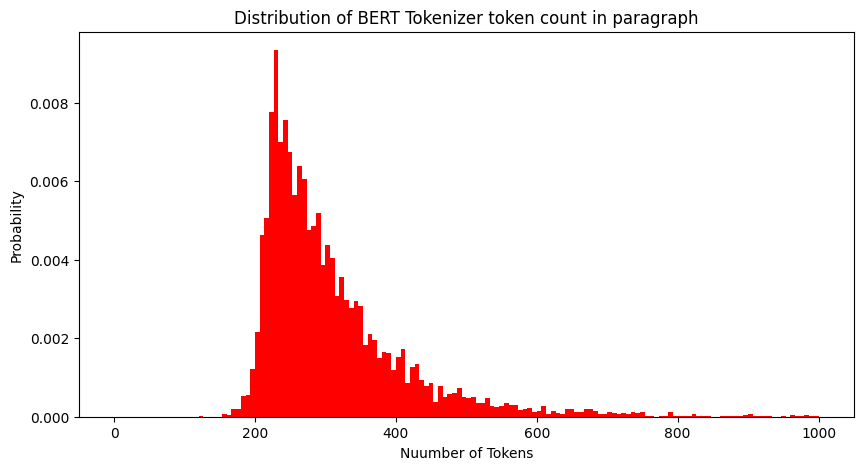

In [ ]:
plt.figure(figsize=(10,5))

plt.hist(context_len,bins=150,range=[0,1000],color='r',density=True)

plt.title('Distribution of BERT Tokenizer token count in paragraph')
plt.xlabel('Nuumber of Tokens')
plt.ylabel('Probability')

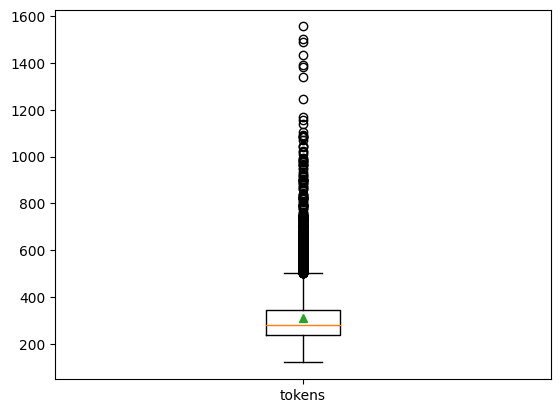

In [ ]:
filtered_context_len = [len for len in context_len if len<3000]
plt.boxplot(filtered_context_len,labels=['tokens'],showmeans=True)
plt.show()

### question 길이 분석

In [ ]:
total_question=[]

for data in train_data['data']:
  qas = [p['qas'] for p in data['paragraphs']]

  for c in qas:
    total_question+=[q['question'] for q in c]

print(len(total_question))

60407


In [ ]:
question_len=[]

for q in total_question:
  question_len.append(len(tokenizer.encode(q,add_special_tokens=False)))

In [ ]:
# 통계값

print('최대 길이 : {}'.format(np.max(question_len)))
print('최소 길이 : {}'.format(np.min(question_len)))
print('평균 길이 : {:.2f}'.format(np.mean(question_len)))
print('중간 길이 : {:.2f}'.format(np.median(question_len)))
print('1사분위 길이 : {}'.format(np.percentile(question_len,25)))
print('3사분위 길이 : {}'.format(np.percentile(question_len,75)))

최대 길이 : 91
최소 길이 : 4
평균 길이 : 22.07
중간 길이 : 21.00
1사분위 길이 : 16.0
3사분위 길이 : 27.0


Text(0, 0.5, 'Probability')

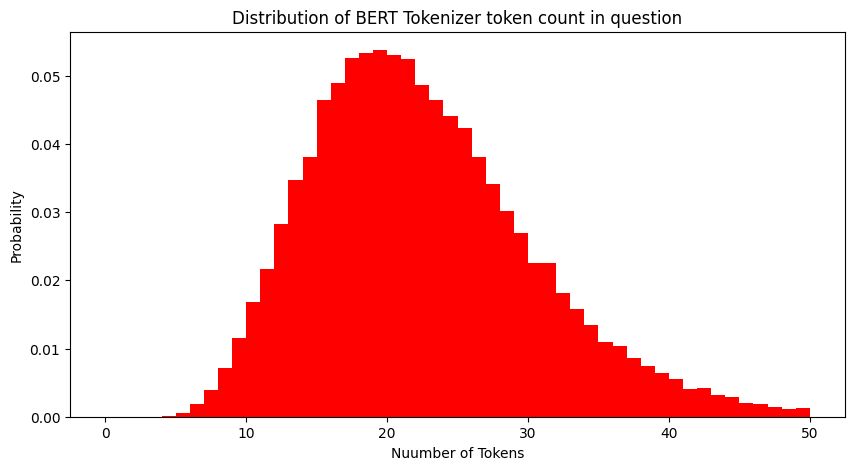

In [ ]:
plt.figure(figsize=(10,5))

plt.hist(question_len,bins=50,range=[0,50],color='r',density=True)

plt.title('Distribution of BERT Tokenizer token count in question')
plt.xlabel('Nuumber of Tokens')
plt.ylabel('Probability')

context 3사분위 값 : 350정도\
question 3사분위 값 : 30 정도\
=> 최종 MAX_LEN : 384 설정

# 전처리

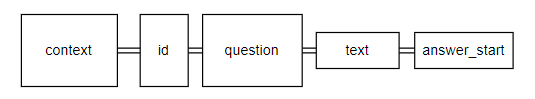

In [15]:
import torch

In [16]:
# hyperparameters

MAX_LEN = 384
BATCH_SIZE = 16
EPOCHS = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
class SquadExample:
  def __init__(self,context,question,text,start_id):
    self.context = context
    self.question = question
    self.text = text # answer
    self.start_id = start_id
    self.skip = False

  def preprocess(self):
    context = self.context
    question = self.question
    text = self.text
    start_id = self.start_id

    #### Clean text
    context = ' '.join(context.split())
    question = ' '.join(question.split())
    text = ' '.join(text.split())

    #### Where is the answer in the context
    end_id = start_id+len(text) # end_id : end index of answer + 1

    if end_id>=len(context): # Ignore the case where the answer have a punctuation by excluding end index of context
      self.skip=True
      return

    context_ans_id = [0]*len(context)
    for i in range(start_id,end_id):
      context_ans_id[i]=1 # context_ans_id : list with 1s in the positions corresponding to the answers and 0s in the other positions.

    #### Where is answer in the context tokenized by WordPiecetokenizer
    answer_ids=[] # list with index of answer in the tokenized context
    tokenized_context = tokenizer.encode(context).ids
    for i ,(start,end) in enumerate(tokenizer.encode(context).offsets):
      if sum(context_ans_id[start:end])>0:
        answer_ids.append(i)

    if len(answer_ids)==0: # Ignore the case where the context dosn't have a answer
      self.skip=True
      return


    #### Complete BERT Input with padding
    tokenized_question=tokenizer.encode(question).ids

    input_ids = tokenized_context+tokenized_question[1:] # Omit [CLS] in the tokenized_question
    attention_mask = [1]*len(input_ids)
    token_type_ids = [1]*len(tokenized_context)+[0]*len(tokenized_question[1:])

    padding_len = MAX_LEN - len(input_ids)

    if padding_len > 0:
      input_ids = input_ids + [0]*padding_len
      attention_mask = attention_mask + [0]*padding_len
      token_type_ids = token_type_ids + [0]*padding_len
    elif padding_len < 0: # Ignore the case where the length of context+question is too long.
      self.skip=True
      return

    self.input_ids = input_ids
    self.attention_mask = attention_mask
    self.token_type_ids = token_type_ids
    self.start_id = answer_ids[0]
    self.end_id = answer_ids[-1]
    self.offsets = tokenizer.encode(context).offsets

In [18]:
def create_squad_example(raw_data):
  squad_example=[]

  for data in raw_data['data']:
    for para in data['paragraphs']:
      context = para['context']
      for qas in para['qas']:
        question = qas['question']
        text = qas['answers'][0]['text']
        answer_start = qas['answers'][0]['answer_start']
        sample = SquadExample(context,question,text,answer_start)
        sample.preprocess()
        squad_example.append(sample)

  return squad_example

In [ ]:
squad_example=create_squad_example(train_data)

In [ ]:
squad_example[10].input_ids

In [ ]:
import torch

In [ ]:
dataset_dict = {'input_ids':[],
                  'attention_mask':[],
                  'token_type_ids':[],
                  'start_id':[],
                  'end_id':[]}

for key in dataset_dict:
  print(key)

input_ids
attention_mask
token_type_ids
start_id
end_id


In [19]:
def create_input_output(examples):
  dataset_dict = {'input_ids':[],
                  'attention_mask':[],
                  'token_type_ids':[],
                  'start_id':[],
                  'end_id':[]}

  for example in examples:
    if example.skip==False:
      for key in dataset_dict:
        dataset_dict[key].append(getattr(example,key))

  for key in dataset_dict:
    dataset_dict[key]=torch.LongTensor(dataset_dict[key])

  x = [dataset_dict['input_ids'],
       dataset_dict['attention_mask'],
       dataset_dict['token_type_ids']]

  y = [dataset_dict['start_id'],
       dataset_dict['end_id']]

  return x, y

In [20]:
train_data = json.load(open(train_path))
dev_data = json.load(open(eval_path))

train_examples = create_squad_example(train_data)
train_inputs,train_outputs = create_input_output(train_examples)

eval_examples = create_squad_example(dev_data)
eval_inputs,eval_outputs = create_input_output(eval_examples)

## Dataset & DataLoader

In [21]:
from torch.utils.data import Dataset, DataLoader

In [22]:
class Customdataset(Dataset):
  def __init__(self,x,y):
    self.input_ids = x[0]
    self.attention_mask = x[1]
    self.token_type_ids = x[2]
    self.start_id = y[0]
    self.end_id = y[1]

  def __getitem__(self, index):
    return {'input_ids':self.input_ids[index], 'attention_mask':self.attention_mask[index], 'token_type_ids':self.token_type_ids[index], 'start_id':self.start_id[index], 'end_id':self.end_id[index]}

  def __len__(self):
    return self.start_id.size()[0]

In [23]:
train_dataset = Customdataset(train_inputs, train_outputs)
eval_dataset = Customdataset(eval_inputs, eval_outputs)

In [24]:
# hyperparameters

MAX_LEN = 384
BATCH_SIZE = 16
EPOCHS = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [25]:
train_iter = DataLoader(train_dataset,BATCH_SIZE)
eval_iter = DataLoader(eval_dataset,BATCH_SIZE)

# 모델 구현

In [27]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=dd76a02af290315dd05fb00bd086ab02fb4c279ad847129a492732dafd5c391b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [28]:
import wget

In [38]:
ls

bert-base-multilingual-cased/  KorNLUDatasets/  NER/  nsmc/


In [34]:
wget.download('https://huggingface.co/bert-base-multilingual-cased/resolve/main/model.safetensors',out='bert-base-multilingual-cased')

'bert-base-multilingual-cased/model.safetensors'

In [35]:
wget.download('https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json',out='bert-base-multilingual-cased')

'bert-base-multilingual-cased/config.json'

In [36]:
import torch
import torch.nn as nn

In [40]:
class BERTMRC(nn.Module):
  def __init__(self):
    super(BERTMRC,self).__init__()
    self.bert=BertModel.from_pretrained('bert-base-multilingual-cased',cache_dir='bert-base-multilingual-cased')
    self.linear1 = nn.Linear(self.bert.config.hidden_size,1)
    self.linear2 = nn.Linear(self.bert.config.hidden_size,1)
    self.softmax = nn.Softmax(-1)

  def forward(self,input_ids,attention_mask,token_type_ids):
    outputs = self.bert(input_ids,attention_mask,token_type_ids) # (batch_size, max_len, hidden_size)

    pred_start = self.linear1(outputs) # (batch_size, max_len, 1)
    pred_start = torch.flatten(pred_start,-1) # (batch_size, max_len)

    pred_end = self.linear2(outputs) # (batch_size, max_len, 1)
    pred_end = torch.flatten(pred_end,-1) # (batch_size, max_len)

    return pred_start, pred_end # (batch_size, max_len),  (batch_size, max_len)

In [41]:
model = BERTMRC().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=5e-5)
criterion = nn.CrossEntropyLoss

loading configuration file bert-base-multilingual-cased/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}

loading weights file bert-base-multilingual-cased/model.safetensors
Some weights of the model checkpoint at bert-base-multilingual-cased were not used whe

# Train, Evaluation, Test

## Train

In [42]:
from tqdm import tqdm

In [43]:
def train(model,optimizer,criterion,train_iter):
  model.train()

  for batch in tqdm(train_iter,desc='training'):

    outputs =model(batch['input_ids'].to(device),batch['attention_mask'].to(device),batch['token_type_ids'].to(device))
    loss = criterion(outputs,(batch['start_id'].to(device),batch['end_id'].to(device)))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
def compute_acc(outputs, )

In [1]:
def evaluation(model,optimizer,criterion,eval_iter):
  model.eval()

  count = 0

  for batch in tqdm(eval_iter,desc='evaluation'):



SyntaxError: ignored